In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import exp, expm1, log, sqrt
from collections import Counter

data_train = pd.read_csv('data_train.csv', 
                         names = ["age", "workclass", "del", "education", 
                                  "education-num", "marital-status", 
                                  "occupation", "relationship", "race", 
                                  "sex", "capital-gain", "capital-loss", 
                                  "hours-per-week", "native-country", "y"])
data_test = pd.read_csv('data_test.csv')

make_y_number = lambda t: 1 if t == ' >50K' else 0
y_num = np.vectorize(make_y_number)
data_train["y"] = y_num(data_train["y"])
data_train = data_train.drop(columns="del")

In [2]:
data_train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


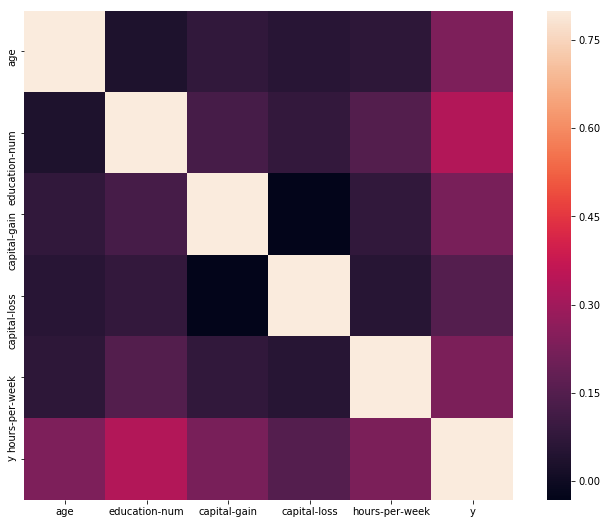

In [3]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [4]:
#print(Counter(data_train['workclass']))
#print(Counter(data_train['marital-status']))
#print(Counter(data_train['occupation']))
#print(Counter(data_train['relationship']))
#print(Counter(data_train['race']))
#print(Counter(data_train['sex']))
#print(Counter(data_train['native-country']))
#print(Counter(data_train['y']))

def get_p(feature, fclass):
    return np.mean(data_train[data_train[feature] == fclass]['y'])
def make_dict(feature):
    return dict(zip(np.asarray(list(Counter(data_train[feature]))), get_p( feature, np.asarray(list(Counter(data_train[feature]))))))
get_p = np.vectorize(get_p)

In [5]:
print(make_dict('marital-status'))

{' Never-married': 0.04596087241411589, ' Married-civ-spouse': 0.4468482905982906, ' Divorced': 0.10420886788206167, ' Married-spouse-absent': 0.08133971291866028, ' Separated': 0.06439024390243903, ' Married-AF-spouse': 0.43478260869565216, ' Widowed': 0.08559919436052367}
